In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/Student_Performance.csv')

In [46]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [47]:
df.shape

(10000, 6)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [49]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [50]:
#Method 1
#df['extracurricular_activities']=1-pd.factorize(df['Extracurricular Activities'])[0]


#Method 2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['extracurricular_activities'] = le.fit_transform(df['Extracurricular Activities'])
df.drop('Extracurricular Activities',axis=1,inplace=True)

In [51]:
# Define the desired column order
desired_column_order = ['Hours Studied', 'Previous Scores','extracurricular_activities','Sleep Hours','Sample Question Papers Practiced','Performance Index']
# Reindex the DataFrame with the desired column order
df = df.reindex(columns=desired_column_order)
df.head()

,Hours Studied,Previous Scores,extracurricular_activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [52]:
df.corr()

,Hours Studied,Previous Scores,extracurricular_activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
extracurricular_activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


<Axes: >

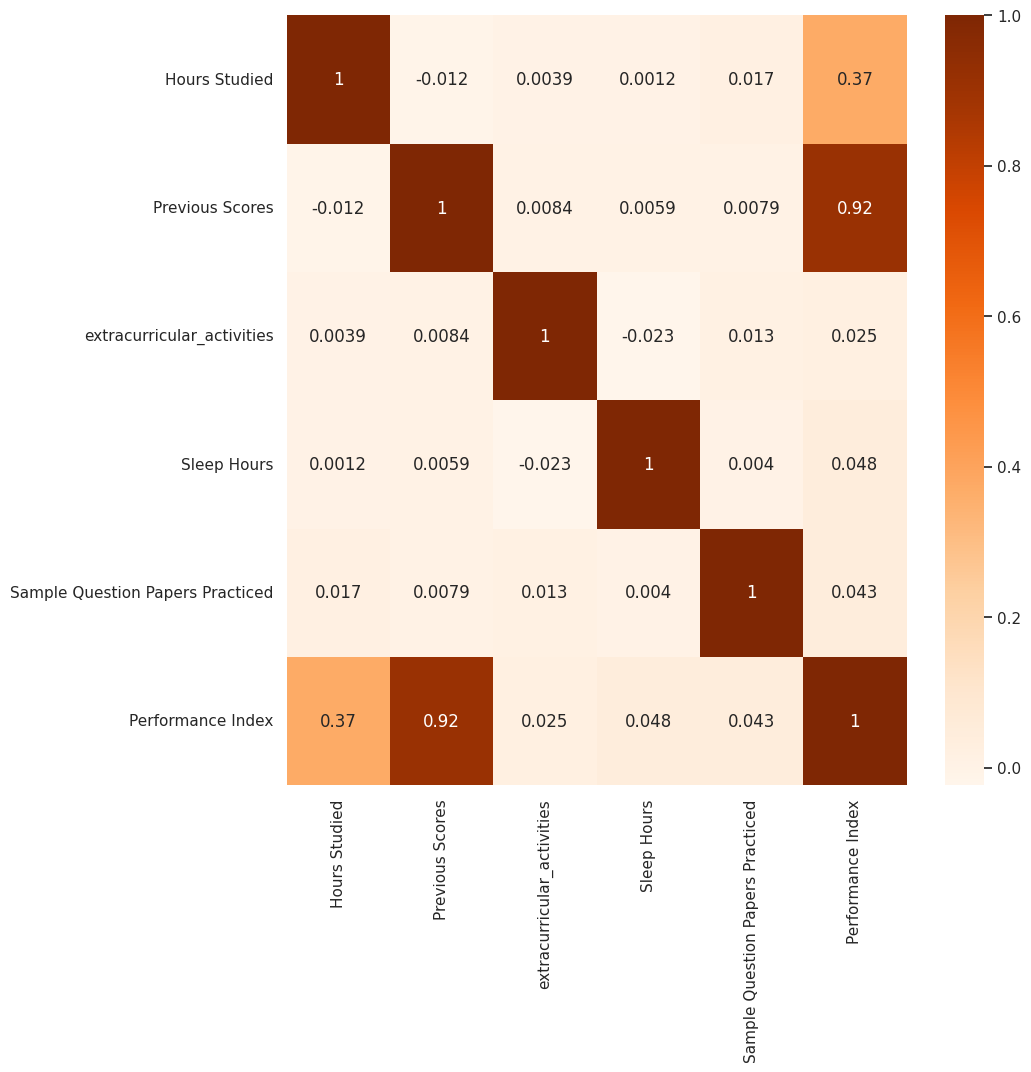

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Oranges')

Text(0, 0.5, 'Performance Index')

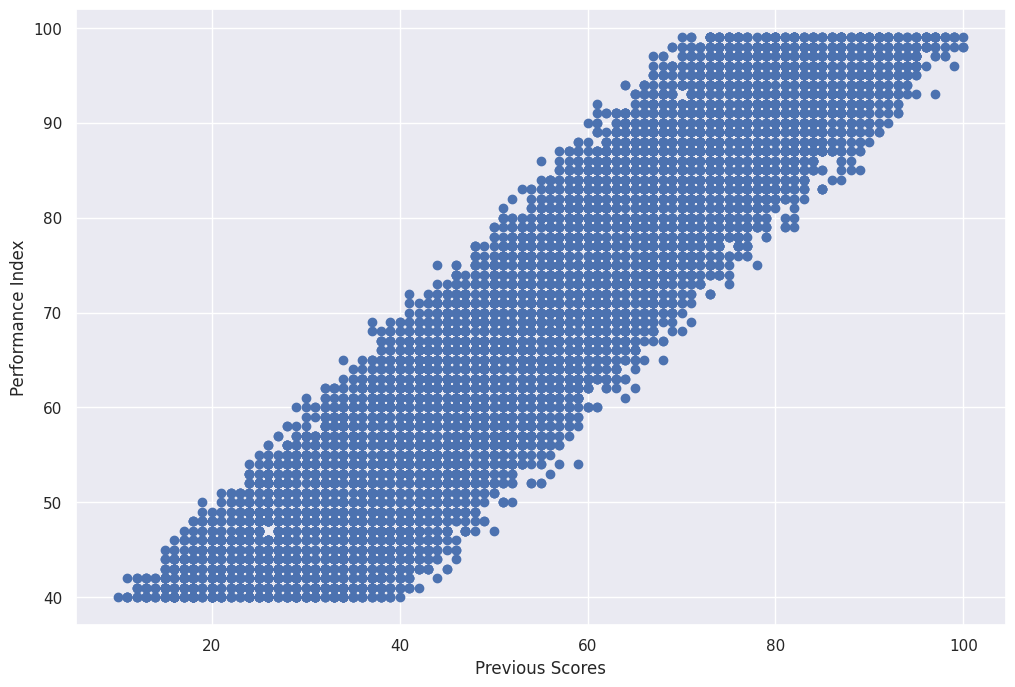

In [54]:
plt.subplots(figsize=(12,8))
plt.scatter(df['Performance Index'],df['Previous Scores'])
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

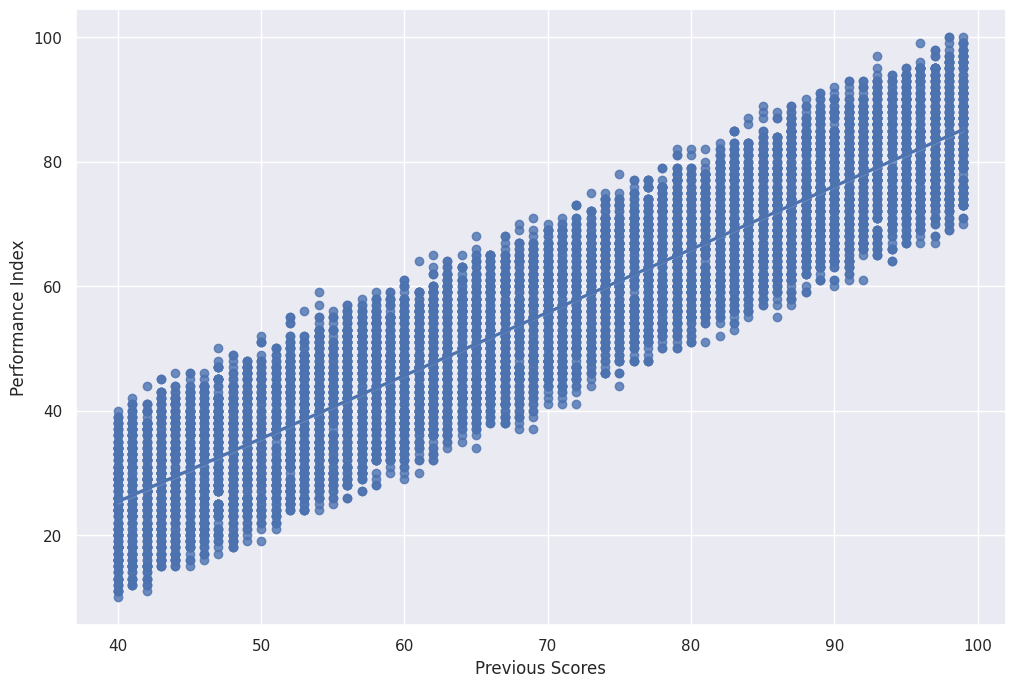

In [55]:
plt.subplots(figsize=(12,8))
sns.regplot(x="Previous Scores",y="Performance Index",data=df)

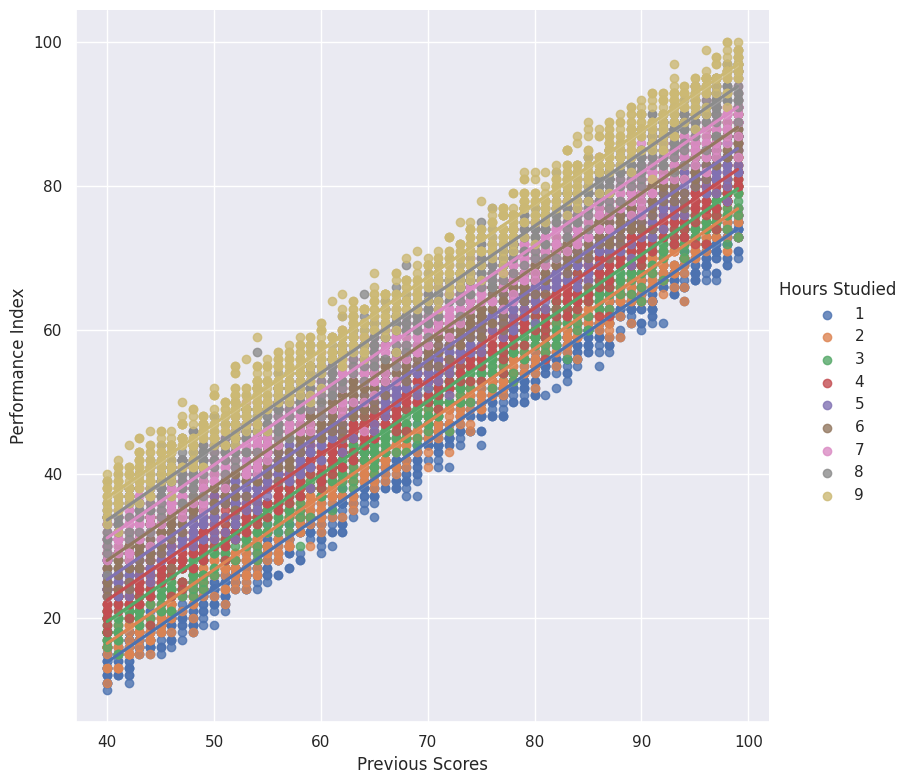

In [56]:
sns.lmplot(x="Previous Scores",y="Performance Index",data=df,hue="Hours Studied",height=8)

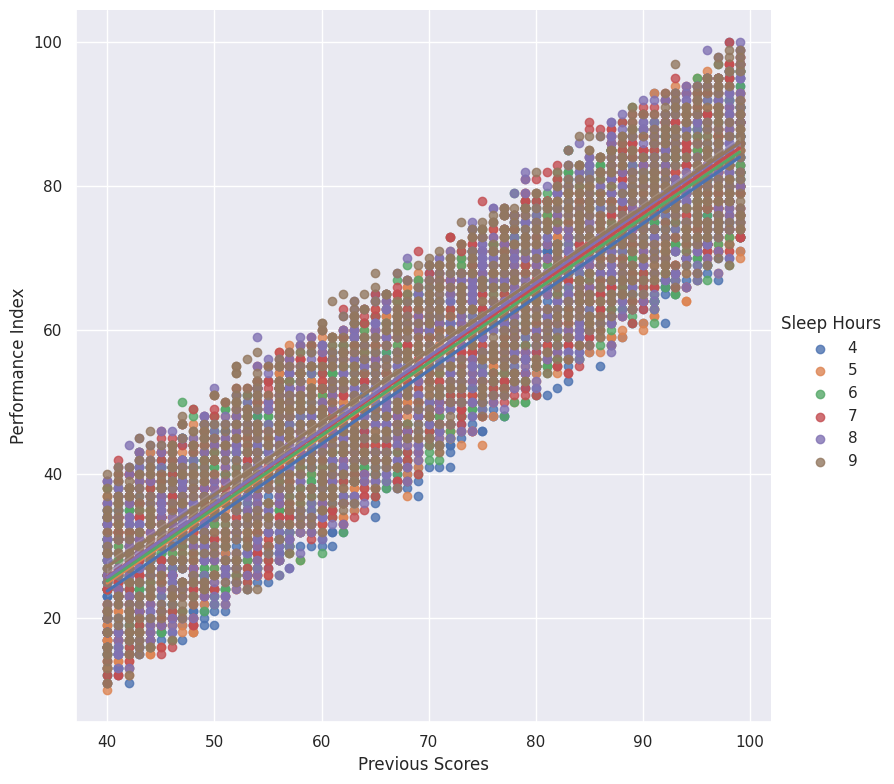

In [57]:
sns.lmplot(x="Previous Scores",y="Performance Index",data=df,hue="Sleep Hours",height=8)

In [58]:
higher_performance_index_chance = df[df["Performance Index"]>=80]
higher_performance_index_chance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     1179 non-null   int64  
 1   Previous Scores                   1179 non-null   int64  
 2   extracurricular_activities        1179 non-null   int64  
 3   Sleep Hours                       1179 non-null   int64  
 4   Sample Question Papers Practiced  1179 non-null   int64  
 5   Performance Index                 1179 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 64.5 KB


In [59]:
higher_performance_index_chance.shape

(1179, 6)

In [60]:
higher_performance_index_chance.corr()

,Hours Studied,Previous Scores,extracurricular_activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.495770,0.007082,-0.052516,0.032726,0.459380
Previous Scores,-0.495770,1.000000,-0.055409,-0.042260,-0.062950,0.429351
extracurricular_activities,0.007082,-0.055409,1.000000,-0.030649,0.016569,0.030321
Sleep Hours,-0.052516,-0.042260,-0.030649,1.000000,-0.027719,0.089736
Sample Question Papers Practiced,0.032726,-0.062950,0.016569,-0.027719,1.000000,0.088786
Performance Index,0.459380,0.429351,0.030321,0.089736,0.088786,1.000000


<ipython-input-61-af467968c166>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(higher_performance_index_chance["Previous Scores"])


<Axes: xlabel='Previous Scores', ylabel='Density'>

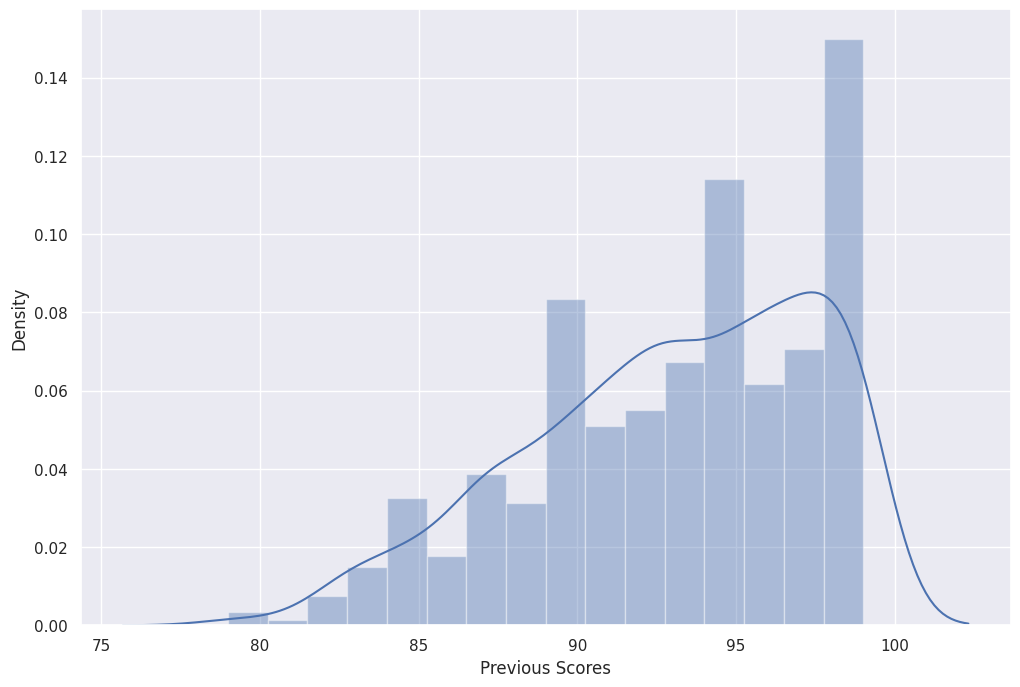

In [61]:
plt.subplots(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.distplot(higher_performance_index_chance["Previous Scores"])

<ipython-input-62-64b5dacb4b9a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(higher_performance_index_chance["Performance Index"])


<Axes: xlabel='Performance Index', ylabel='Density'>

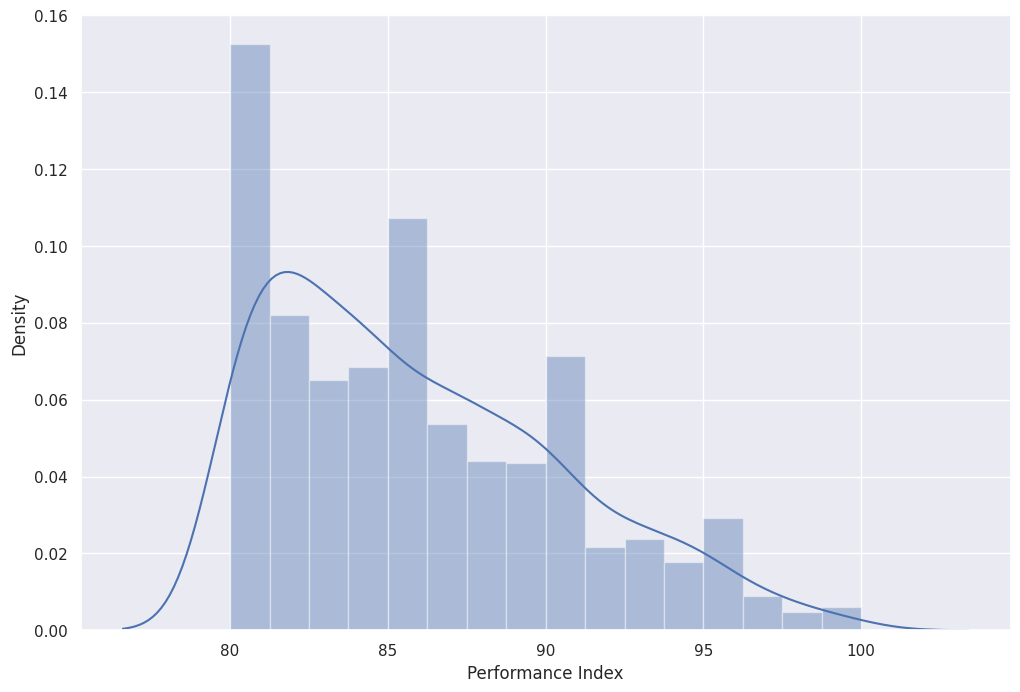

In [62]:
plt.subplots(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.distplot(higher_performance_index_chance["Performance Index"])

In [63]:
X = df["Previous Scores"].values
X = X/100
y = df["Performance Index"].values

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train.reshape(-1,1),y_train)
y_pred = lr.predict(X_test.reshape(-1,1))

In [66]:
lr.score(X_test.reshape(-1,1),y_test.reshape(-1,1))

0.8302553966529473

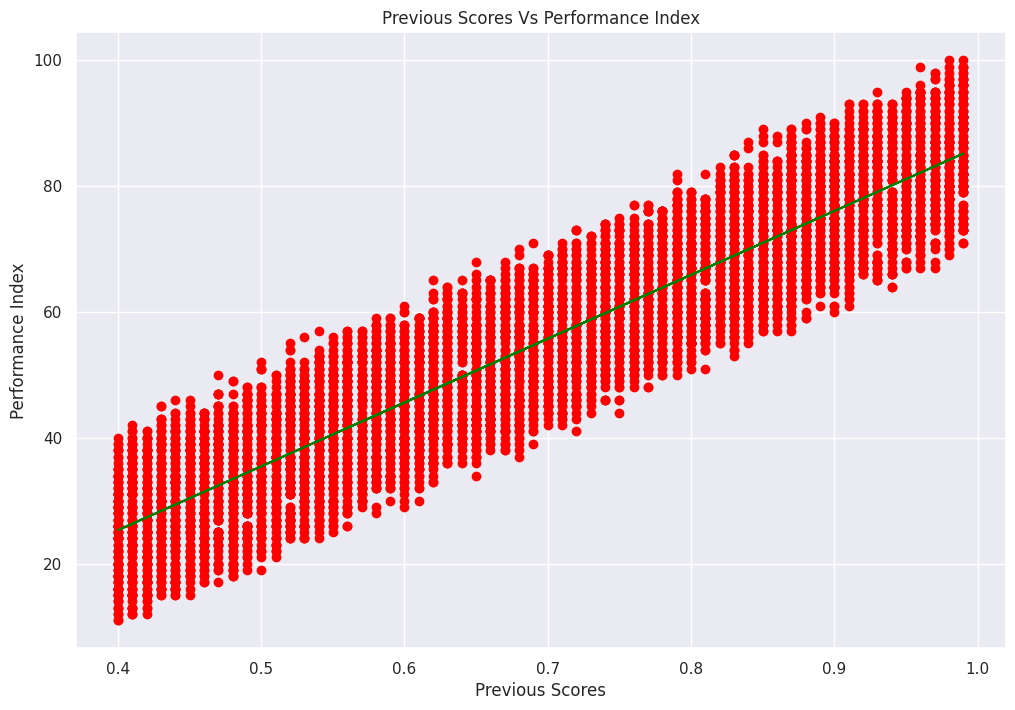

In [67]:
plt.subplots(figsize=(12,8))
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, lr.predict(X_train.reshape(-1,1)),color="green")
plt.title("Previous Scores Vs Performance Index")
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")
plt.show()

In [68]:
test = 90
val = test/100
val_out = lr.predict(np.array([[val]]))
print("Higher Performance Index : ",val_out[0] )

Higher Performance Index :  76.0468094994643


In [69]:
x = df.drop(['Performance Index'],axis=1)
y = df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=5)

In [70]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=5)
regr.fit(X_train,y_train)
regr.score(X_test,y_test)

0.8097520282025574

In [71]:
val = regr.predict([[7,99,1,9,1]])
print("Your chances are (in %) :")
print(val[0])

Your chances are (in %) :
78.19126447138785


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [72]:
df.head()

,Hours Studied,Previous Scores,extracurricular_activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [73]:
df['Performance Index'] = [1 if each > 80 else 0 for each in df['Performance Index']]
df.head()

,Hours Studied,Previous Scores,extracurricular_activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,1
1,4,82,0,4,2,0
2,8,51,1,7,2,0
3,5,52,1,5,2,0
4,7,75,0,8,5,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   extracurricular_activities        10000 non-null  int64
 3   Sleep Hours                       10000 non-null  int64
 4   Sample Question Papers Practiced  10000 non-null  int64
 5   Performance Index                 10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


In [75]:
x = df[['Hours Studied','Previous Scores','extracurricular_activities','Sleep Hours','Sample Question Papers Practiced']]
y = df['Performance Index']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

print(f"Size of splitted data")
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_test {y_test.shape}")

Size of splitted data
x_train (7500, 5)
y_train (7500,)
x_test (2500, 5)
y_test (2500,)


In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
model_dt = DecisionTreeRegressor(random_state=1)
model_rf = RandomForestRegressor(random_state=1)
model_lr = LogisticRegression(random_state=1,solver='lbfgs',max_iter=1000)

model_dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [77]:
model_rf.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [78]:
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [79]:
y_pred_dt = model_dt.predict(x_test)
y_pred_rf = model_rf.predict(x_test)
y_pred_lr = model_lr.predict(x_test)

In [80]:
result = pd.DataFrame({
    "Actual":y_test,
    "predicted":y_pred_dt
})
result

,Actual,predicted
9953,0,0.0
3850,0,0.0
4962,0,0.0
3886,0,0.0
5437,1,1.0
...,...,...
6955,0,0.0
557,0,0.0
2455,0,0.0
3920,0,0.0


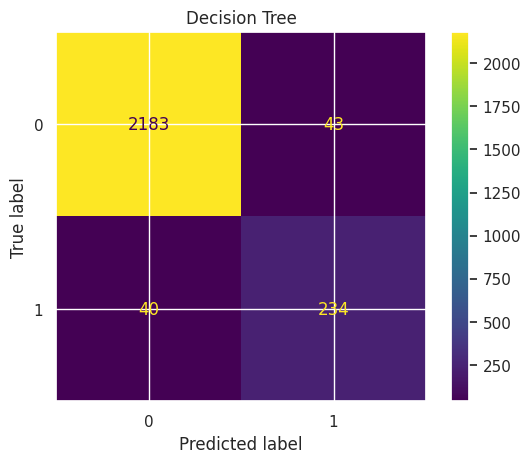

Accuracy is 0.9668
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2226
           1       0.84      0.85      0.85       274

    accuracy                           0.97      2500
   macro avg       0.91      0.92      0.92      2500
weighted avg       0.97      0.97      0.97      2500



In [81]:
y_pred_dt = [1 if each > 0.75 else 0 for each in y_pred_dt]

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
plt.title('Decision Tree')
plt.show()

print(f"Accuracy is {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))

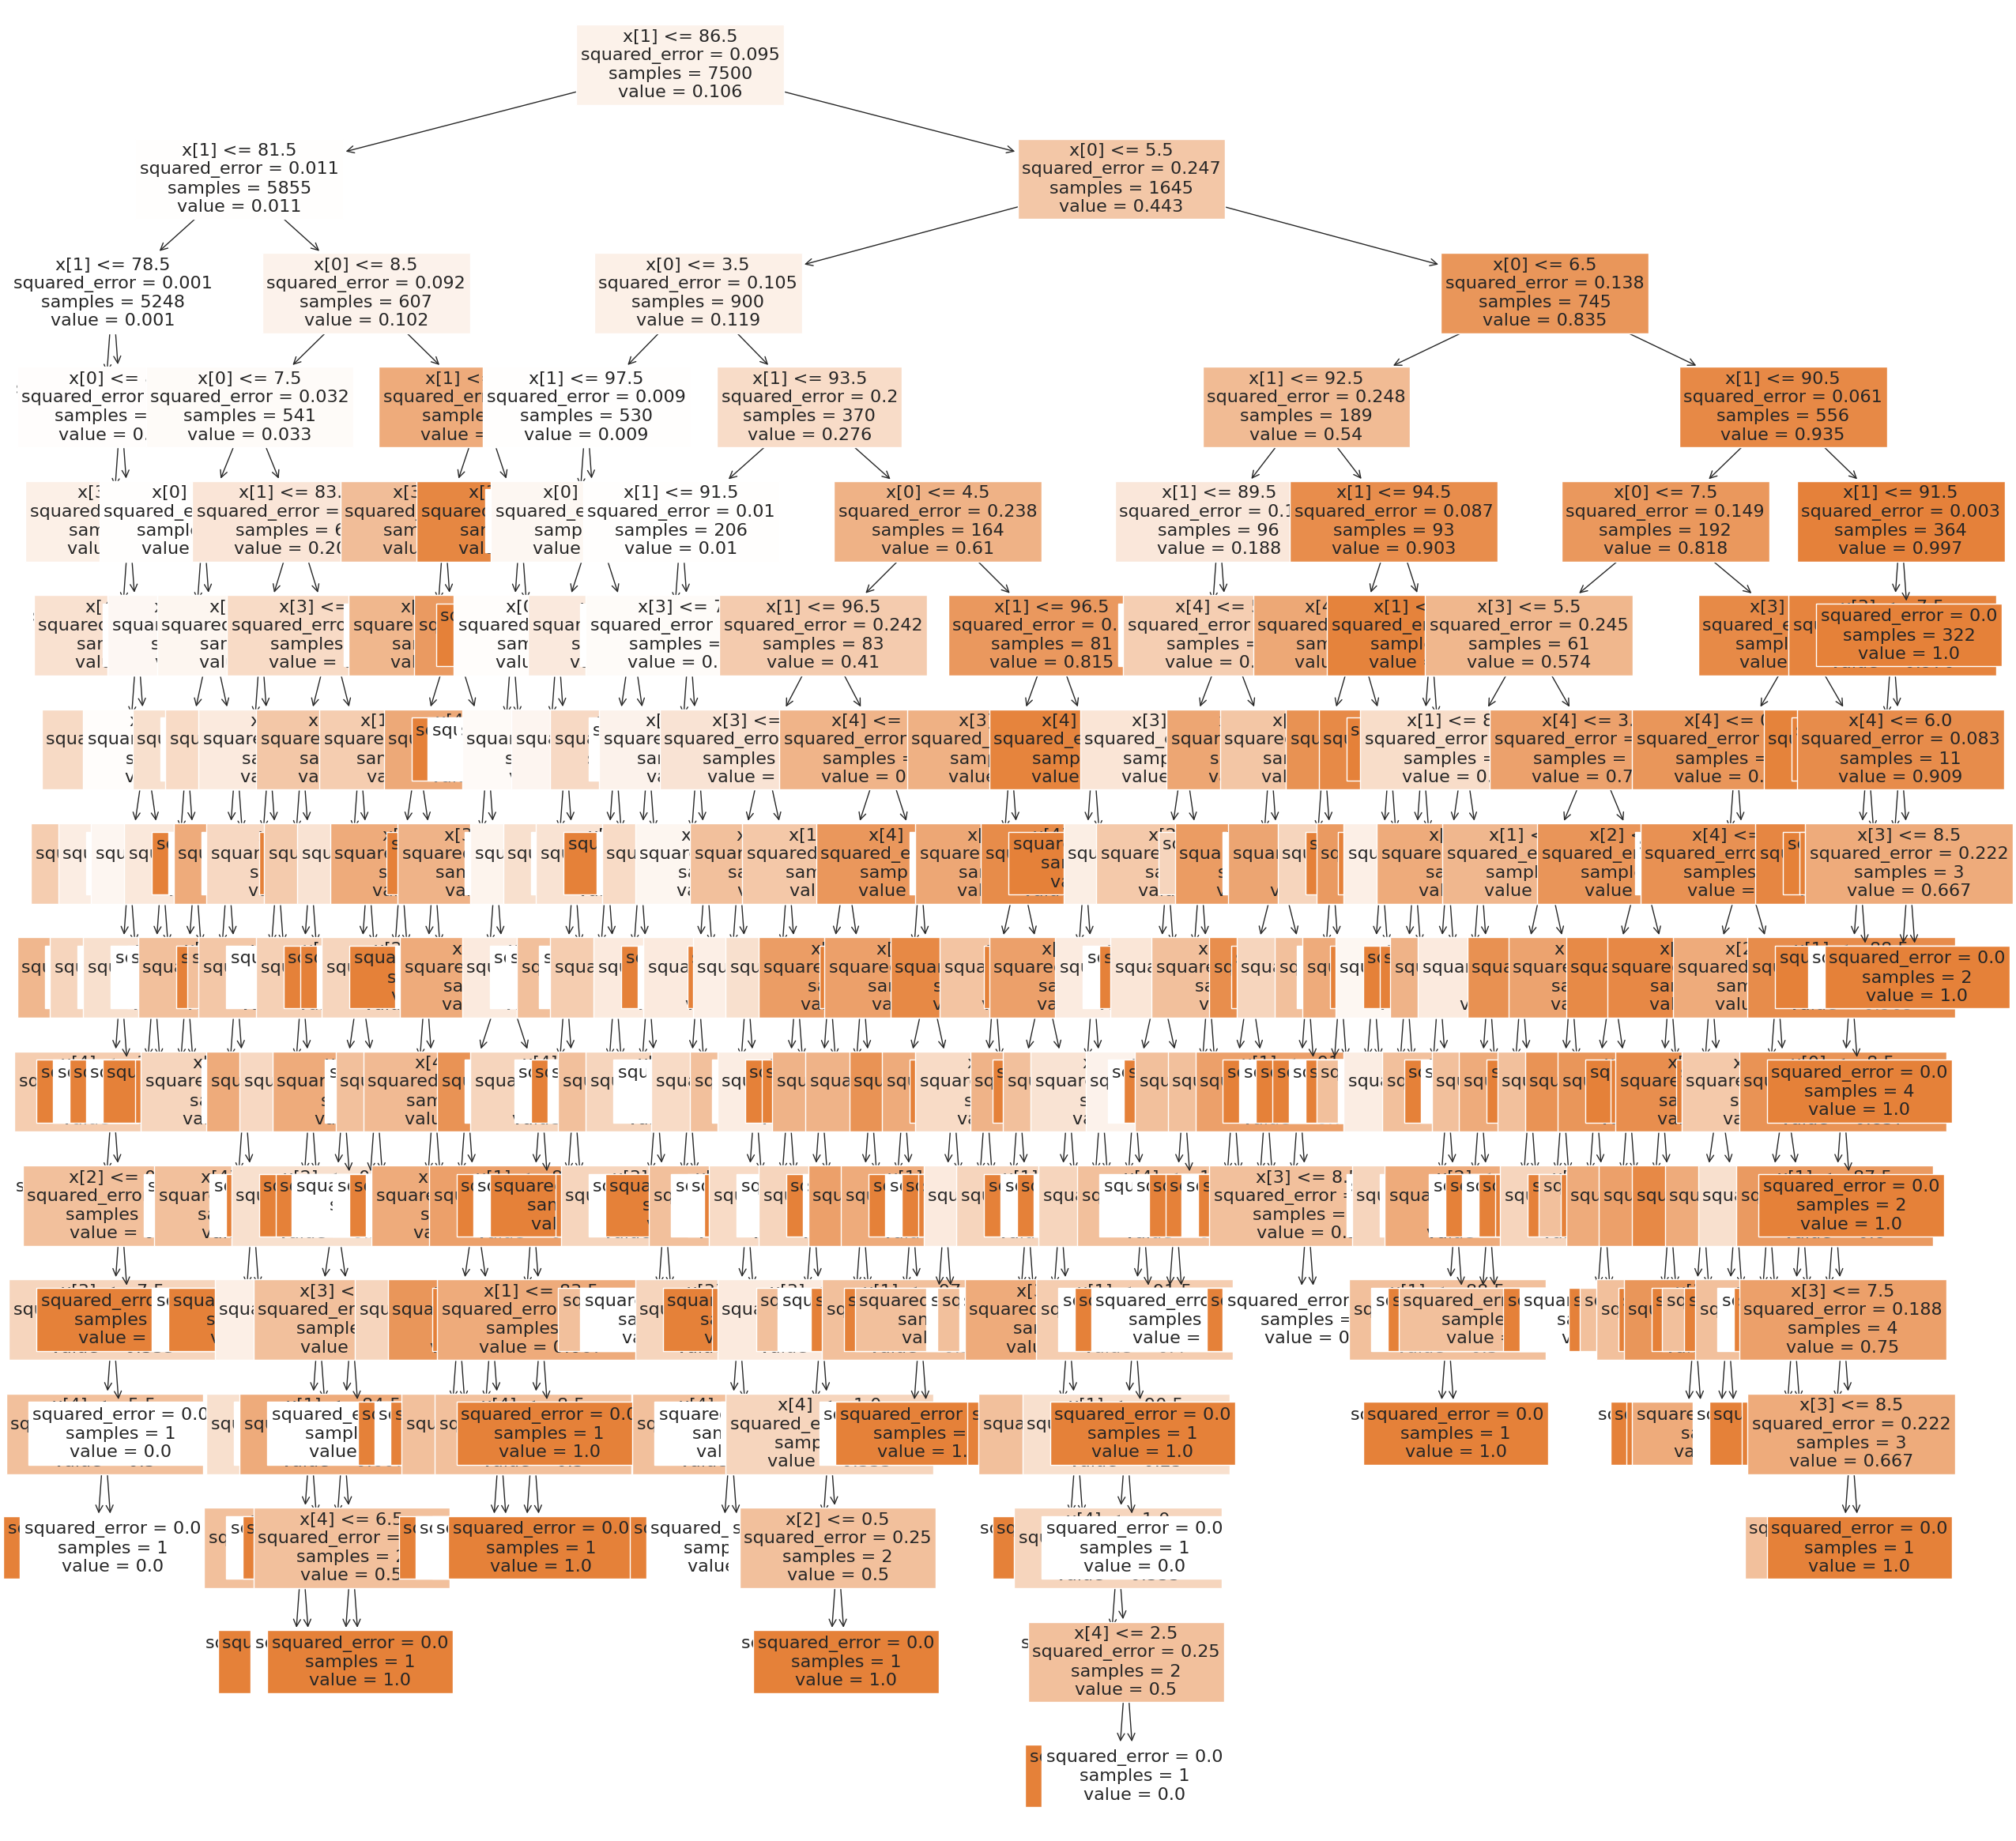

In [82]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
tree.plot_tree(model_dt, filled=True, fontsize=16)
plt.show()

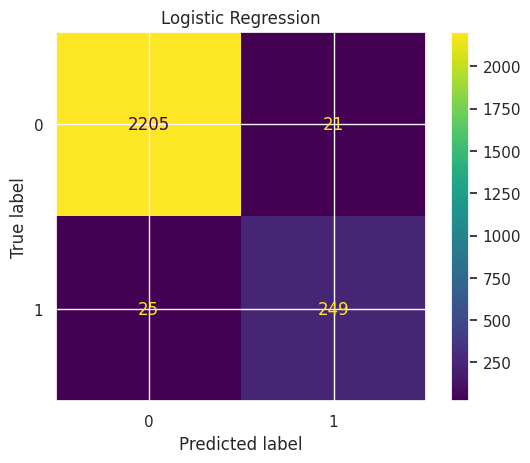

 Accuracy is 0.9816
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2226
           1       0.92      0.91      0.92       274

    accuracy                           0.98      2500
   macro avg       0.96      0.95      0.95      2500
weighted avg       0.98      0.98      0.98      2500



In [83]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)
plt.title('Logistic Regression')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_lr)}")
print(classification_report(y_test,y_pred_lr))

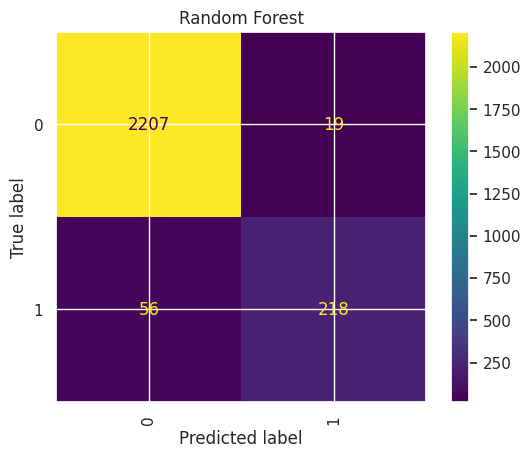

 Accuracy is 0.97
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2226
           1       0.92      0.80      0.85       274

    accuracy                           0.97      2500
   macro avg       0.95      0.89      0.92      2500
weighted avg       0.97      0.97      0.97      2500



In [84]:
y_pred_rf = [1 if each > 0.75 else 0 for each in y_pred_rf]

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf,xticks_rotation='vertical')
plt.title('Random Forest')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_rf)}")
print(classification_report(y_test,y_pred_rf))